I. THU THẬP VÀ MÔ TẢ DỮ LIỆU

In [1]:
import pandas as pd
data1 = pd.read_csv("C://Users//MY LAP//Desktop//pdb_data_seq.csv")
data2 = pd.read_csv("C://Users//MY LAP//Desktop//pdb_data_no_dups.csv")


Tích hợp dữ liệu

In [2]:
merged_data = pd.merge(data1, data2, on="structureId", how="inner")

In [3]:
merged_data.columns

Index(['structureId', 'chainId', 'sequence', 'residueCount_x',
       'macromoleculeType_x', 'classification', 'experimentalTechnique',
       'macromoleculeType_y', 'residueCount_y', 'resolution',
       'structureMolecularWeight', 'crystallizationMethod',
       'crystallizationTempK', 'densityMatthews', 'densityPercentSol',
       'pdbxDetails', 'phValue', 'publicationYear'],
      dtype='object')

Kích thước dữ liệu sau tích hợp

In [4]:
merged_data.shape

(471149, 18)

Loại bỏ những bản ghi trùng lặp và những bản ghi rỗng

In [5]:
merged_data.drop_duplicates(inplace=True)  
merged_data.dropna(inplace=True) 

merged_data.shape


(215142, 18)

Số lượng giá trị của mỗi lớp

In [6]:
counts = merged_data['classification'].value_counts()
print(counts)


classification
HYDROLASE                         23115
RIBOSOME                          19120
TRANSFERASE                       18270
OXIDOREDUCTASE                    17037
IMMUNE SYSTEM                      9712
                                  ...  
TRANSFERASE, TRANSPORT PROTEIN        1
ENDOCYTOSIS, PROTEIN BINDING          1
IMMUNOGLOBULIN                        1
TOXIN BINDING PROTEIN                 1
TUMOR SUPPRESSOR                      1
Name: count, Length: 2511, dtype: int64


Lọc ra những lớp có số lượng lớn hơn 5000

In [7]:
import numpy as np

counts = merged_data['classification'].value_counts()

types = counts[counts > 5000].index.to_numpy()

data = merged_data[merged_data['classification'].isin(types)]

filtered_counts = data['classification'].value_counts()
print(filtered_counts)
print(f"{data.shape[0]} is the number of records in the final filtered dataset")


classification
HYDROLASE                        23115
RIBOSOME                         19120
TRANSFERASE                      18270
OXIDOREDUCTASE                   17037
IMMUNE SYSTEM                     9712
HYDROLASE/HYDROLASE INHIBITOR     8966
LYASE                             6224
Name: count, dtype: int64
102444 is the number of records in the final filtered dataset


Phân bố của dữ liệu sau khi lọc

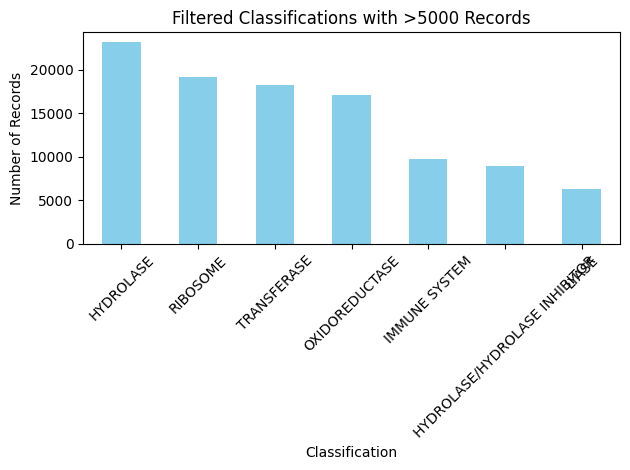

In [8]:
import matplotlib.pyplot as plt

filtered_counts.plot(kind='bar', color='skyblue')
plt.title('Filtered Classifications with >5000 Records')
plt.ylabel('Number of Records')
plt.xlabel('Classification')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Xử lý dữ liệu dạng chuỗi và chia tập train, test

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(analyzer='char_wb', ngram_range=(4, 4))
X_vectorized = vect.fit_transform(data['sequence'])
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, data['classification'], test_size=0.2, random_state=168)


In [10]:
print(X_train)

  (np.int32(0), np.int32(126980))	1
  (np.int32(0), np.int32(135272))	1
  (np.int32(0), np.int32(133078))	1
  (np.int32(0), np.int32(50927))	1
  (np.int32(0), np.int32(44986))	1
  (np.int32(0), np.int32(27802))	1
  (np.int32(0), np.int32(10679))	1
  (np.int32(0), np.int32(79305))	1
  (np.int32(0), np.int32(5846))	1
  (np.int32(0), np.int32(142755))	1
  (np.int32(0), np.int32(159579))	1
  (np.int32(0), np.int32(143495))	1
  (np.int32(0), np.int32(132055))	1
  (np.int32(0), np.int32(44902))	1
  (np.int32(0), np.int32(70945))	1
  (np.int32(0), np.int32(130361))	1
  (np.int32(0), np.int32(82627))	1
  (np.int32(0), np.int32(128745))	1
  (np.int32(0), np.int32(12809))	1
  (np.int32(0), np.int32(123228))	1
  (np.int32(0), np.int32(10873))	1
  (np.int32(0), np.int32(143490))	1
  (np.int32(0), np.int32(26188))	1
  (np.int32(0), np.int32(141425))	1
  (np.int32(0), np.int32(132620))	1
  :	:
  (np.int32(81954), np.int32(119859))	1
  (np.int32(81954), np.int32(70299))	1
  (np.int32(81954), np.int32

Phân bố của tập kiểm tra

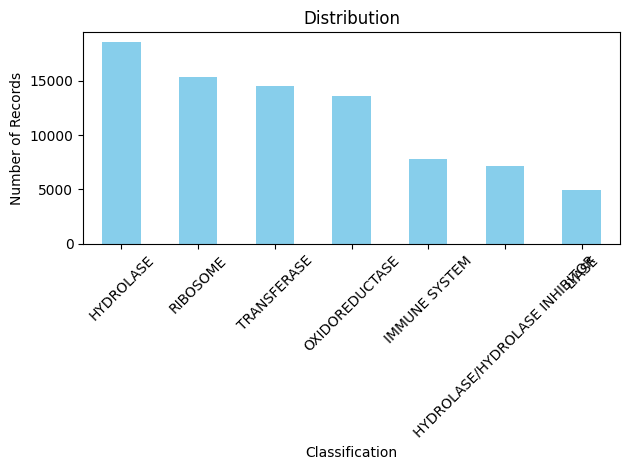

In [11]:
import matplotlib.pyplot as plt

y_train.value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution')
plt.ylabel('Number of Records')
plt.xlabel('Classification')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Mô phỏng phân bố thực tế của dữ liệu bằng cách thêm phần dữ liệu đã được giảm trong quá trình undersample trên tập test vào tập kiểm tra

In [12]:
from sklearn.utils import shuffle
from scipy.sparse import vstack
import numpy as np

unique_classes = np.unique(y_train)
min_class_size = min([np.sum(y_train == cls) for cls in unique_classes]) 

print(f"Giảm số mẫu xuống {min_class_size} mẫu cho mỗi lớp.")

undersampled_indices = []

for cls in unique_classes:
    cls_indices = np.where(y_train == cls)[0]
    undersampled_cls_indices = np.random.choice(cls_indices, size=min_class_size, replace=False)
    undersampled_indices.extend(undersampled_cls_indices)

undersampled_indices = shuffle(undersampled_indices, random_state=42)

X_train_undersampled = X_train[undersampled_indices]
y_train_undersampled = y_train.iloc[undersampled_indices]

print(f"X_train_undersampled shape: {X_train_undersampled.shape}")
print(f"y_train_undersampled shape: {y_train_undersampled.shape}")


remaining_indices = [i for i in range(X_train.shape[0]) if i not in undersampled_indices]

X_test_new = vstack([X_test, X_train[remaining_indices]])
y_test_new = pd.concat([y_test, y_train.iloc[remaining_indices]], axis=0)

print(f"X_test_new shape: {X_test_new.shape}")
print(f"y_test_new shape: {y_test_new.shape}")

X_train = X_train_undersampled
y_train = y_train_undersampled

print("Đã hoàn tất việc giảm mẫu và cập nhật lại tập train/test.")


Giảm số mẫu xuống 4980 mẫu cho mỗi lớp.
X_train_undersampled shape: (34860, 165270)
y_train_undersampled shape: (34860,)
X_test_new shape: (67584, 165270)
y_test_new shape: (67584,)
Đã hoàn tất việc giảm mẫu và cập nhật lại tập train/test.


In [13]:
class_counts = pd.Series(y_train_undersampled).value_counts()

print(f"Số lượng các lớp: {len(class_counts)}")
print("Phân phối số mẫu trong từng lớp:")
print(class_counts)

Số lượng các lớp: 7
Phân phối số mẫu trong từng lớp:
classification
IMMUNE SYSTEM                    4980
LYASE                            4980
HYDROLASE/HYDROLASE INHIBITOR    4980
TRANSFERASE                      4980
HYDROLASE                        4980
OXIDOREDUCTASE                   4980
RIBOSOME                         4980
Name: count, dtype: int64


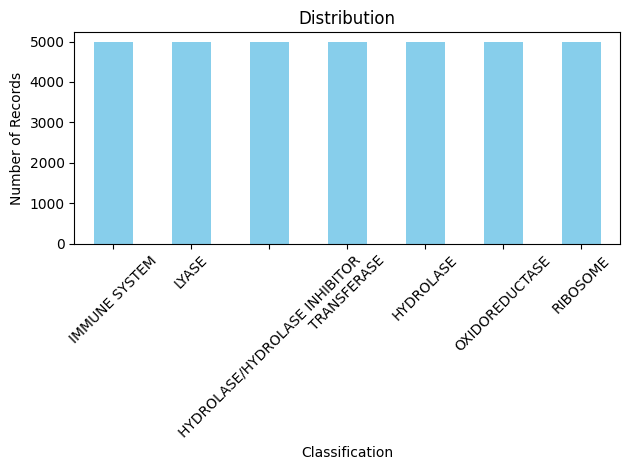

In [14]:
import matplotlib.pyplot as plt

y_train_undersampled.value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution')
plt.ylabel('Number of Records')
plt.xlabel('Classification')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Phân bố của tập kiểm tra

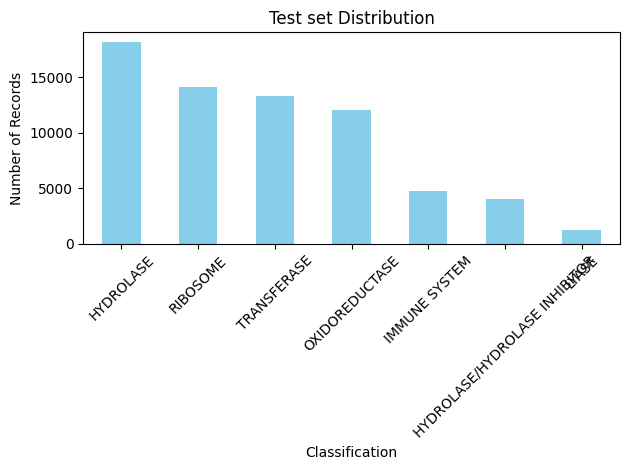

In [15]:
import matplotlib.pyplot as plt

y_test_new.value_counts().plot(kind='bar', color='skyblue')
plt.title('Test set Distribution')
plt.ylabel('Number of Records')
plt.xlabel('Classification')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

III. Giảm chiều, phân cụm và trực quan hóa dữ liệu

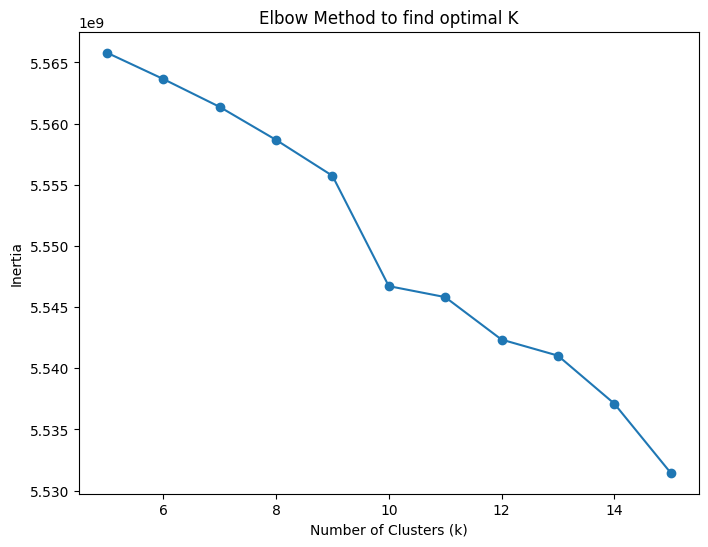

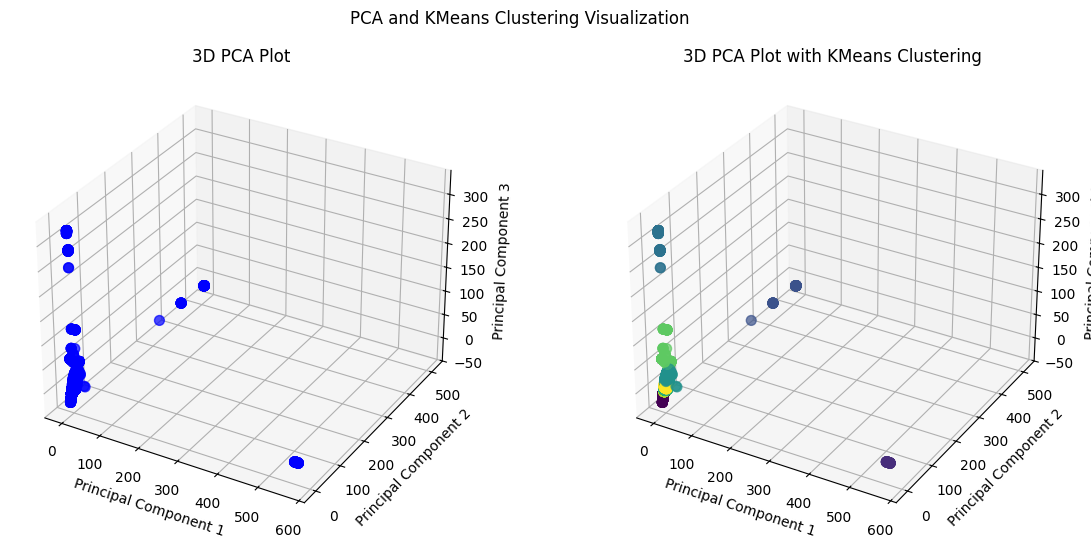

In [16]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score

scaler = StandardScaler(with_mean=False) 
X_train_scaled = scaler.fit_transform(X_train_undersampled)
X_test_scaled = scaler.fit_transform(X_test_new)
pca3 = PCA(n_components=3)
X_train_pca3 = pca3.fit_transform(X_train_scaled)
X_test_pca3 = pca3.fit_transform(X_test_scaled)

inertia = []
for k in range(5, 16):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(5, 16), inertia, marker='o')
plt.title('Elbow Method to find optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

kmeans = KMeans(n_clusters=9, random_state=1) 
kmeans.fit(X_train_pca3)
labels = kmeans.labels_ 

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')  
ax1.scatter(X_train_pca3[:, 0], X_train_pca3[:, 1], X_train_pca3[:, 2], s=50, c='blue', alpha=0.7)
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_zlabel('Principal Component 3')
ax1.set_title('3D PCA Plot')

ax2 = fig.add_subplot(122, projection='3d')  
ax2.scatter(X_train_pca3[:, 0], X_train_pca3[:, 1], X_train_pca3[:, 2], c=labels, cmap='viridis', s=50, alpha=0.7)
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_zlabel('Principal Component 3')
ax2.set_title('3D PCA Plot with KMeans Clustering')

plt.suptitle('PCA and KMeans Clustering Visualization')

plt.show()



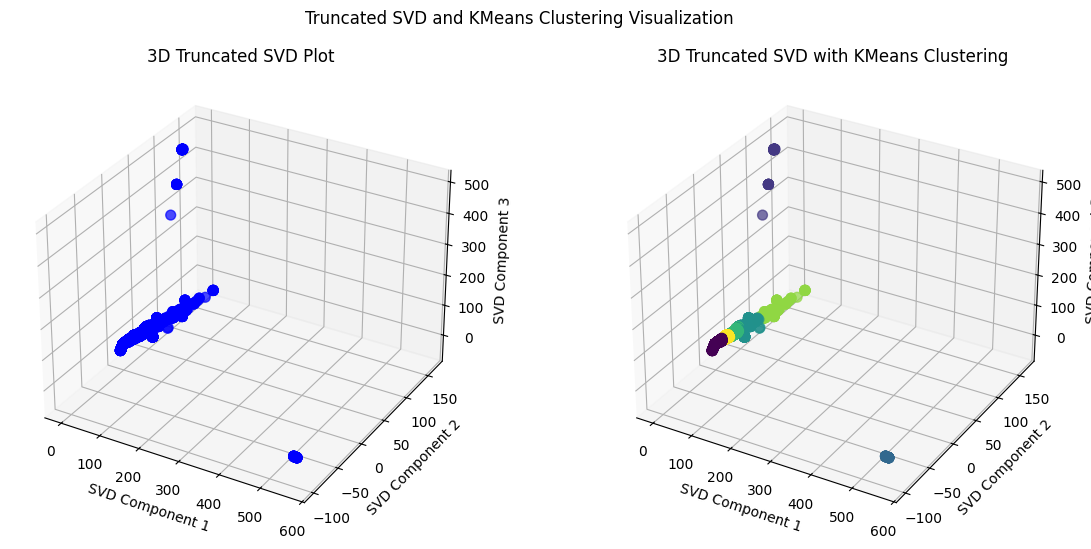

In [17]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

svd = TruncatedSVD(n_components=3, random_state=1)
X_train_svd3 = svd.fit_transform(X_train_scaled)

kmeans = KMeans(n_clusters=7, random_state=1)
kmeans.fit(X_train_svd3)
labels_kmeans = kmeans.labels_

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(X_train_svd3[:, 0], X_train_svd3[:, 1], X_train_svd3[:, 2], s=50, c='blue', alpha=0.7)
ax1.set_xlabel('SVD Component 1')
ax1.set_ylabel('SVD Component 2')
ax1.set_zlabel('SVD Component 3')
ax1.set_title('3D Truncated SVD Plot')

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_train_svd3[:, 0], X_train_svd3[:, 1], X_train_svd3[:, 2], c=labels_kmeans, cmap='viridis', s=50, alpha=0.7)
ax2.set_xlabel('SVD Component 1')
ax2.set_ylabel('SVD Component 2')
ax2.set_zlabel('SVD Component 3')
ax2.set_title('3D Truncated SVD with KMeans Clustering')

plt.suptitle('Truncated SVD and KMeans Clustering Visualization')
plt.show()


IV. Huấn luyện và đánh giá mô hình

In [18]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

def evaluate_model(model, X_train_df, y_train, X_test_df, y_test):

    model.fit(X_train_df, y_train)

   
    y_pred = model.predict(X_test_df)
    y_pred_prob = model.predict_proba(X_test_df)

    print(f"Model: {model.__class__.__name__}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()

    if isinstance(model, LogisticRegression) or isinstance(model, RandomForestClassifier):
        print("Do nothing!!")      
    else:  
        cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)

        cv_scores = cross_val_score(model, X_train_df, y_train, cv=cv, scoring='roc_auc_ovr')
        print("Cross Validation Score: ", '{0:.2%}'.format(cv_scores.mean()))

        y_test_bin = label_binarize(y_test, classes=model.classes_)

        roc_auc = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')
        print("ROC AUC Score: ", '{0:.2%}'.format(roc_auc))

        plt.figure(figsize=(10, 8))
        n_classes = y_test_bin.shape[1]
        colors = plt.get_cmap('tab10', n_classes)

        for i in range(n_classes):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
            plt.plot(fpr, tpr, color=colors(i), label=f'Class {model.classes_[i]} (AUC = {roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i]):.2f})')

        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Multi-Class ROC Curve')
        plt.legend(loc='best')
        plt.show()

    train_accuracy = accuracy_score(y_train, model.predict(X_train_df))
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f"train accuracy: {train_accuracy}")
    print(f"test accuracy: {test_accuracy}")



Multinomial Naive Bayes

Model: MultinomialNB
                               precision    recall  f1-score   support

                    HYDROLASE       0.87      0.80      0.83     18135
HYDROLASE/HYDROLASE INHIBITOR       0.63      0.82      0.71      3986
                IMMUNE SYSTEM       0.96      0.86      0.90      4732
                        LYASE       0.90      0.93      0.92      1244
               OXIDOREDUCTASE       0.95      0.91      0.93     12057
                     RIBOSOME       0.99      0.97      0.98     14140
                  TRANSFERASE       0.83      0.93      0.88     13290

                     accuracy                           0.89     67584
                    macro avg       0.88      0.89      0.88     67584
                 weighted avg       0.89      0.89      0.89     67584

Cross Validation Score:  97.70%
ROC AUC Score:  97.62%


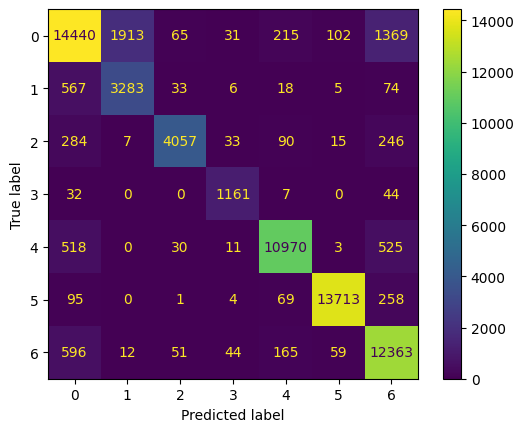

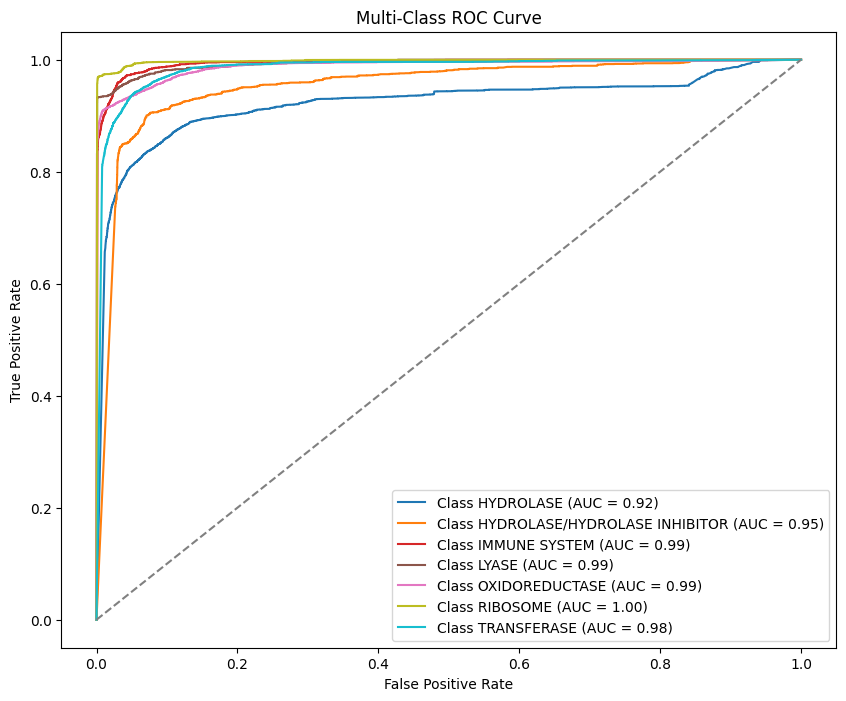

train accuracy: 0.936201950659782
test accuracy: 0.8875917376893939


In [19]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
nb_model = MultinomialNB()
evaluate_model(nb_model,X_train_undersampled,y_train_undersampled,X_test_new,y_test_new)


Tokenize protein sequence

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
Y = lb.fit_transform(data.classification)
max_length = 529
seqs = data.sequence.values

tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(seqs)

tokenizer_dict = tokenizer.word_index


X = tokenizer.texts_to_sequences(seqs)
X = pad_sequences(X, maxlen=max_length)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2)

SVM

In [21]:

# from sklearn.svm import SVC
# def train_evaluate_svm_poly(X, y, train_size, random_state=42):
#     X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=train_size, random_state=random_state)

#     model = SVC(kernel='poly', degree=3, C=1, gamma='scale', random_state=random_state)
#     model.fit(X_train, y_train)

#     y_val_pred = model.predict(X_val)
#     accuracy = accuracy_score(y_val, y_val_pred)

#     print(f"Train size: {train_size*100:.0f}%, Validation size: {(1-train_size)*100:.0f}%")
#     print(f"Accuracy: {accuracy:.2%}")
#     print(classification_report(y_val, y_val_pred))
#     print("-" * 50)

#     return model, accuracy



# Y_1d = Y.argmax(axis=1)
# model_svm,svm_acc = train_evaluate_svm_poly(X,Y_1d, train_size=0.5)

Chuyển từ bài toán phân loại thành hồi quy

In [22]:

# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error,r2_score

# scores = model_svm.decision_function(X_train)[:, 0]

# def train_and_evaluate_regression(X_train, X_test, scores, model_type='linear'):
#     if model_type == 'linear':
#         model = LinearRegression()

#     else:
#         raise ValueError("Invalid model type")

#     model.fit(X_train, scores)
#     predictions = model.predict(X_test)

#     mse = mean_squared_error(scores[:len(predictions)], predictions)
#     r2 = r2_score(scores[:len(predictions)], predictions)

#     return model,predictions,mse, r2

# model,predictions,mse_lr,r2_lr = train_and_evaluate_regression(X_train,X_test,scores)

In [23]:
# scores

In [24]:
# print(f'Mean square error: {mse_lr:.2f}')
# print(f'R2 score: {r2_lr:.2f}')


CNN

In [25]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=6, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


![CNN-architecture](cnn_diagram.png)


In [27]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
 143/2562 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.3338 - loss: 1.7302

KeyboardInterrupt: 

In [28]:
from tensorflow.keras.models import load_model
#model.save('my_model.keras')
model = load_model('my_model.keras')

2562/2562 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step
641/641 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
train-acc = 0.965932523946068
test-acc = 0.9665186197471815


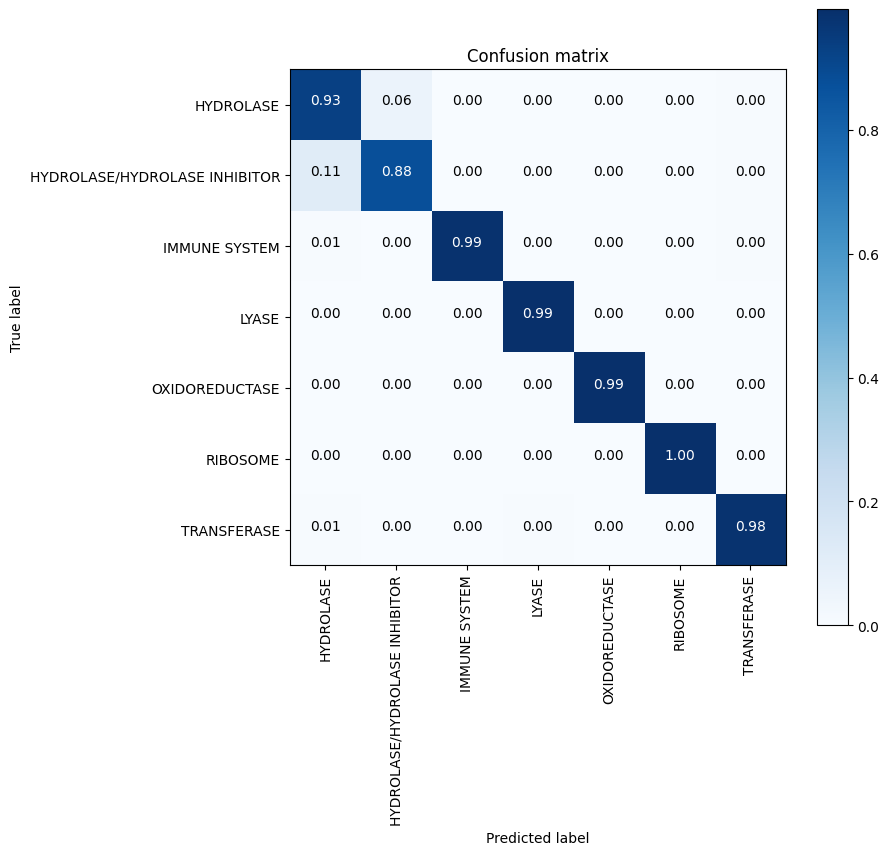

                               precision    recall  f1-score   support

                    HYDROLASE       0.94      0.93      0.94      4608
HYDROLASE/HYDROLASE INHIBITOR       0.85      0.88      0.86      1805
                IMMUNE SYSTEM       0.99      0.99      0.99      1961
                        LYASE       0.98      0.99      0.99      1217
               OXIDOREDUCTASE       0.99      0.99      0.99      3322
                     RIBOSOME       1.00      1.00      1.00      3909
                  TRANSFERASE       0.99      0.98      0.98      3667

                     accuracy                           0.97     20489
                    macro avg       0.96      0.97      0.96     20489
                 weighted avg       0.97      0.97      0.97     20489



In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import itertools

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print("train-acc = " + str(accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_pred, axis=1))))
print("test-acc = " + str(accuracy_score(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))))

cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1))

cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(precision=2)
plt.figure(figsize=(8,8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(lb.classes_))
plt.xticks(tick_marks, lb.classes_, rotation=90)
plt.yticks(tick_marks, lb.classes_)
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
   plt.text(j, i, format(cm[i, j], '.2f'), horizontalalignment="center", color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(classification_report(np.argmax(y_test, axis=1), np.argmax(test_pred, axis=1), target_names=lb.classes_))

Mã hóa chuỗi protein bằng phương pháp CountVectorize

In [30]:
from sklearn.feature_extraction.text import CountVectorizer 

##
def process_protein_sequence_with_vocab(sequence, k=4, vectorizer=None):
    if not sequence or not all(c.isalpha() and c.isupper() for c in sequence):
        raise ValueError("Protein sequence must contain only uppercase letters (A-Z) and not be empty.")
    
    kmers = [sequence[i:i + k] for i in range(len(sequence) - k + 1)]
    
    kmers_string = ' '.join(kmers)
    
    vector = vectorizer.transform([kmers_string])
    
    return vector, vectorizer

def update_X_vectorized(new_sequence, X_vectorized, vectorizer, k=4):

    feature_vector, _ = process_protein_sequence_with_vocab(new_sequence, k, vectorizer)
    
    updated_X_vectorized = vstack([X_vectorized, feature_vector])
    
    return updated_X_vectorized


Mã hóa chuỗi protein bằng phương pháp Tokenize

In [31]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def protein_tokenizer(tokenizer,sequence, max_length=max_length):
   
    tokenizer.fit_on_texts([sequence])  

    tokenized_sequence = tokenizer.texts_to_sequences([sequence])[0]
    
    padded_sequence = pad_sequences([tokenized_sequence], maxlen=max_length, padding='pre', truncating='post')
    
    return padded_sequence.reshape(padded_sequence.shape[0],padded_sequence.shape[1],1)

protein_sequence = "ACDEFGHIKLMNPQRSTVWYXYZ"
prepared_sequence = protein_tokenizer(tokenizer,protein_sequence)

print("Prepared Protein Sequence for Prediction:\n", prepared_sequence)

Prepared Protein Sequence for Prediction:
 [[[ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0

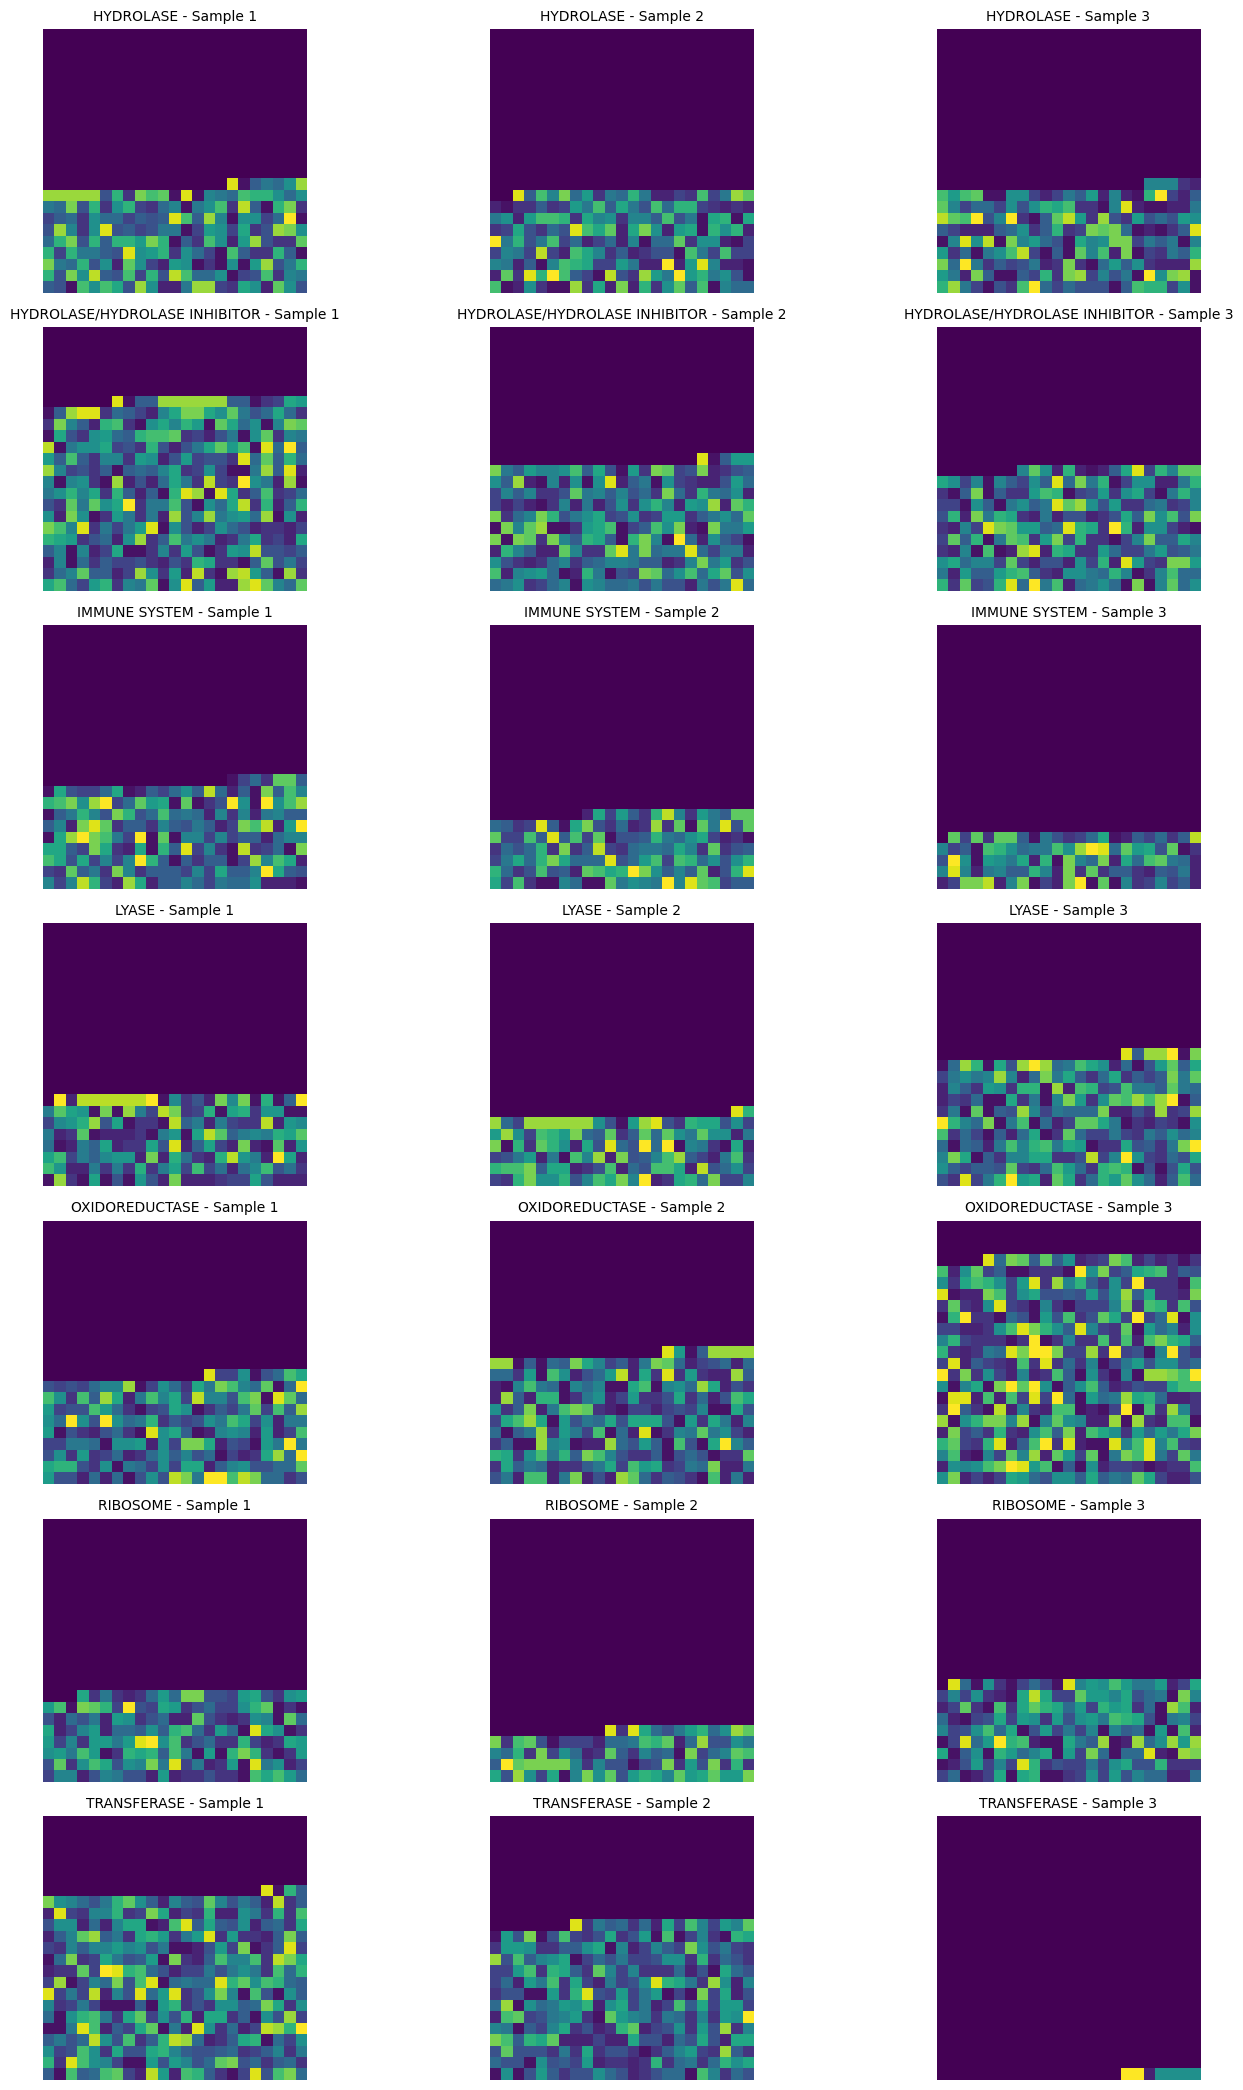

In [32]:
import matplotlib.pyplot as plt  
import numpy as np  

classes = [  
    'HYDROLASE',   
    'HYDROLASE/HYDROLASE INHIBITOR',   
    'IMMUNE SYSTEM',   
    'LYASE',   
    'OXIDOREDUCTASE',   
    'RIBOSOME',   
    'TRANSFERASE'  
]  

samples_per_class = {i: [] for i in range(len(classes))}  

for i in range(len(y_test)):  
    label_index = np.argmax(y_test[i]) 
    if len(samples_per_class[label_index]) < 3:  
         
        image = X_test[i].reshape(23, 23) 
        samples_per_class[label_index].append(image)  

  
fig, axes = plt.subplots(len(classes), 3, figsize=(15, len(classes) * 3))  

for class_index, ax_row in enumerate(axes):  
    for img_index in range(3):
        if img_index < len(samples_per_class[class_index]):  
            ax = ax_row[img_index]  
            img = samples_per_class[class_index][img_index]  
            cax = ax.imshow(img, cmap='viridis')  
            ax.set_title(f'{classes[class_index]} - Sample {img_index + 1}', fontsize=10)  
            ax.axis('off') 
        else:  
            ax_row[img_index].axis('off')

plt.tight_layout()  
plt.show()

KỊCH BẢN 1: dự đoán các protein nằm ngoài bộ dữ liệu

In [33]:
s = 'MLTPEQKQKKAALSASEGEEVPQDKAPSHVPFLLIGGGTAAFAAARSIRARDPGARVLIVSEDPELPYMRPPLSKELWFSDDPNVTKTLRFKQANGKERSIYFQPPSFYVSAQDLPHIENGGVAVLTGKKVVQLDVRDNMVKLNDGSQITYEKCLIATGGTPRSLSAIDRAGAEVKSRTTLFRKIGDFRSLEKISREVKSITIIGGGFLGSELACALGRKARALGTEVIQLFPEKGNMGKILPEYLSNWTMEKVRREGVKVMPNAIVQSVGVSSGKLLIKLKDGRKVETDHIVAAVGLEPNVELAKTGGLEIDSDFGGFRVNAELQARSNIWVAGDAACFYDIKLGRRRVEHHDHAVVSGRLAGENMTGAAKPYWHQSMFWSDLGPDVGYEAIGLVDSSLPTVGVFAKATAQDNPKSATEQSGTGIRSESETESEASEITIPPSTPAVPQAPVQGEDYGKGVIFYLRDKVVVGIVLWNIFNRMPIARKIIKDGEQHEDLNEVAKLFNIHEDSGSGPGSGSMSYCRQEGKDRIIFVTKEDHETPSSAELVADDPNDPYEEHGLILPLEVLFQ'
t = protein_tokenizer(tokenizer,s)
probabilities = model.predict(t)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [34]:
print(len('MLTPEQKQKKAALSASEGEEVPQDKAPSHVPFLLIGGGTAAFAAARSIRARDPGARVLIVSEDPELPYMRPPLSKELWFSDDPNVTKTLRFKQANGKERSIYFQPPSFYVSAQDLPHIENGGVAVLTGKKVVQLDVRDNMVKLNDGSQITYEKCLIATGGTPRSLSAIDRAGAEVKSRTTLFRKIGDFRSLEKISREVKSITIIGGGFLGSELACALGRKARALGTEVIQLFPEKGNMGKILPEYLSNWTMEKVRREGVKVMPNAIVQSVGVSSGKLLIKLKDGRKVETDHIVAAVGLEPNVELAKTGGLEIDSDFGGFRVNAELQARSNIWVAGDAACFYDIKLGRRRVEHHDHAVVSGRLAGENMTGAAKPYWHQSMFWSDLGPDVGYEAIGLVDSSLPTVGVFAKATAQDNPKSATEQSGTGIRSESETESEASEITIPPSTPAVPQAPVQGEDYGKGVIFYLRDKVVVGIVLWNIFNRMPIARKIIKDGEQHEDLNEVAKLFNIHEDSGSGPGSGSMSYCRQEGKDRIIFVTKEDHETPSSAELVADDPNDPYEEHGLILPLEVLFQ'))

571


In [35]:
t

array([[[19],
        [ 3],
        [ 9],
        [12],
        [ 5],
        [15],
        [ 7],
        [15],
        [ 7],
        [ 7],
        [ 2],
        [ 2],
        [ 3],
        [ 6],
        [ 2],
        [ 6],
        [ 5],
        [ 1],
        [ 5],
        [ 5],
        [ 4],
        [12],
        [15],
        [ 8],
        [ 7],
        [ 2],
        [12],
        [ 6],
        [17],
        [ 4],
        [12],
        [14],
        [ 3],
        [ 3],
        [10],
        [ 1],
        [ 1],
        [ 1],
        [ 9],
        [ 2],
        [ 2],
        [14],
        [ 2],
        [ 2],
        [ 2],
        [11],
        [ 6],
        [10],
        [11],
        [ 2],
        [11],
        [ 8],
        [12],
        [ 1],
        [ 2],
        [11],
        [ 4],
        [ 3],
        [10],
        [ 4],
        [ 6],
        [ 5],
        [ 8],
        [12],
        [ 5],
        [ 3],
        [12],
        [16],
        [19],
        [11],
        [12],
      

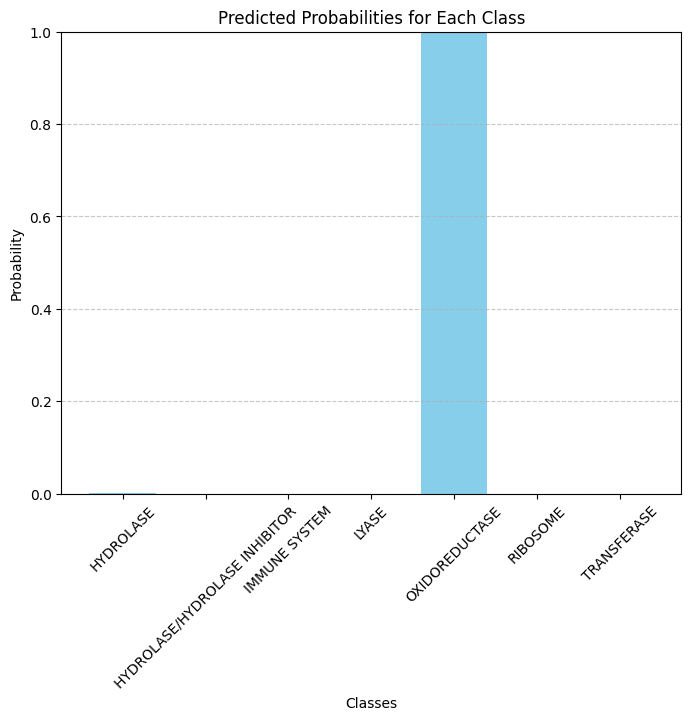

In [36]:



classes = ['HYDROLASE', 'HYDROLASE/HYDROLASE INHIBITOR', 'IMMUNE SYSTEM', 'LYASE', 'OXIDOREDUCTASE', 'RIBOSOME', 'TRANSFERASE']
plt.figure(figsize=(8, 6))
plt.bar(classes, probabilities, color='skyblue')
plt.title("Predicted Probabilities for Each Class")
plt.ylabel("Probability")
plt.xlabel("Classes")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

![OXIDOREDUCTASE](oxi.png)


In [37]:
_9C0N = protein_tokenizer(tokenizer,'PHMGALHVVIVGGGFGGIAAASQLQALNVPFMLVDMKDSFHHNVAALRASVETGFAKKTFISYSVTFKDNFRQGLVVGIDLKNQMVLLQGGEALPFSHLILATGSTGPFPGKFNEVSSQQAAIQAYEDMVRQVQRSRFIVVVGGGSAGVEMAAEIKTEYPEKEVTLIHSQVALADKELLPSVRQEVKEILLRKGVQLLLSERVSNLEELPLNEYREYIKVQTDKGTEVATNLVILCTGIKINSSAYRKAFESRLASSGALRVNEHLQVEGHSNVYAIGDCADVRTPKMAYLAGLHANIAVANIVNSVKQRPLQAYKPGALTFLLSMGRNDGVGQISGFYVGRLMVRLTKSRDLFVSTSWKTMRQSPP')
_9C0L = protein_tokenizer(tokenizer,'GPGMRIKTPSPSYLKGTNGHAILLLHSFTGTNRDVKHLAAELNDQGFSCYAPNYPGHGLLLKDFMTYNVDDWWEEVEKAYQFLVNEGYESISATGVSLGGLMTLKLAQHYPLKRIAVMSAPKEKSDDGLIEHLVYYSQRMSNILNLDQQASSAQLAAIDDYEGEITKFQHFIDDIMTNLNVIKMPANILFGGKDAPSYETSAHFIYEHLGSVDKELNGLKDSHHLMTHGEGRDILEENVIRFFNALT')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


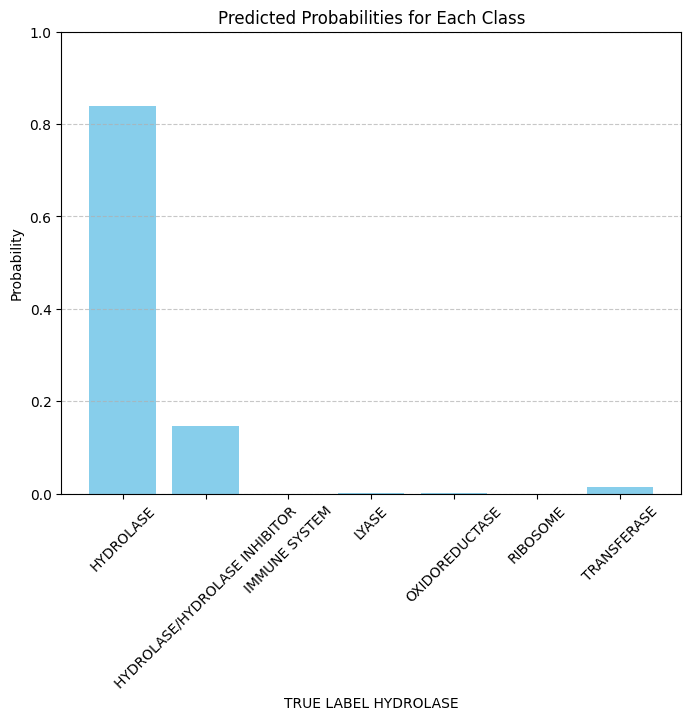

In [38]:
#TRUE LABEL HYDROLASE
_9C0N_proba = model.predict(_9C0N)[0]
plt.figure(figsize=(8, 6))
plt.bar(classes, _9C0N_proba, color='skyblue')
plt.title("Predicted Probabilities for Each Class")
plt.ylabel("Probability")
plt.xlabel("TRUE LABEL HYDROLASE")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


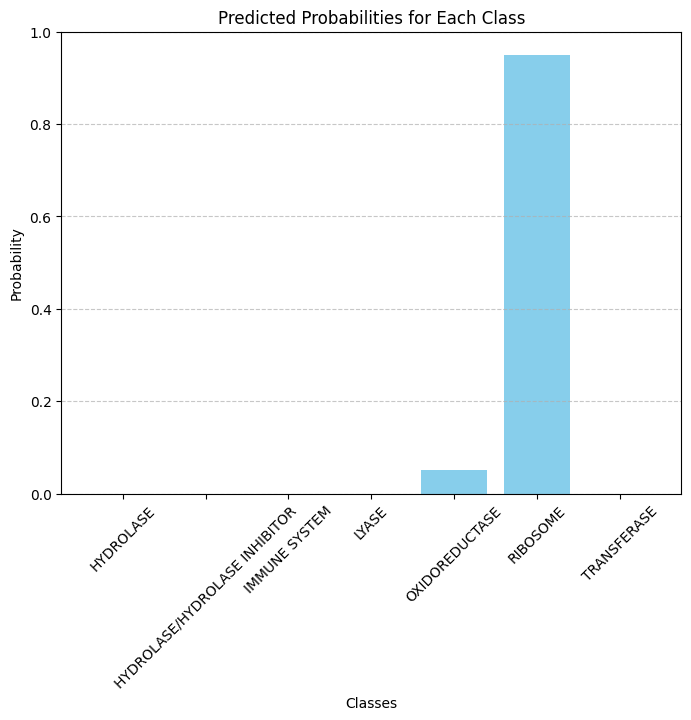

In [39]:


#TRUE LABEL HYDROLASE

_9C0L_proba = model.predict(_9C0L)[0]
plt.figure(figsize=(8, 6))
plt.bar(classes, _9C0L_proba, color='skyblue')
plt.title("Predicted Probabilities for Each Class")
plt.ylabel("Probability")
plt.xlabel("Classes")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


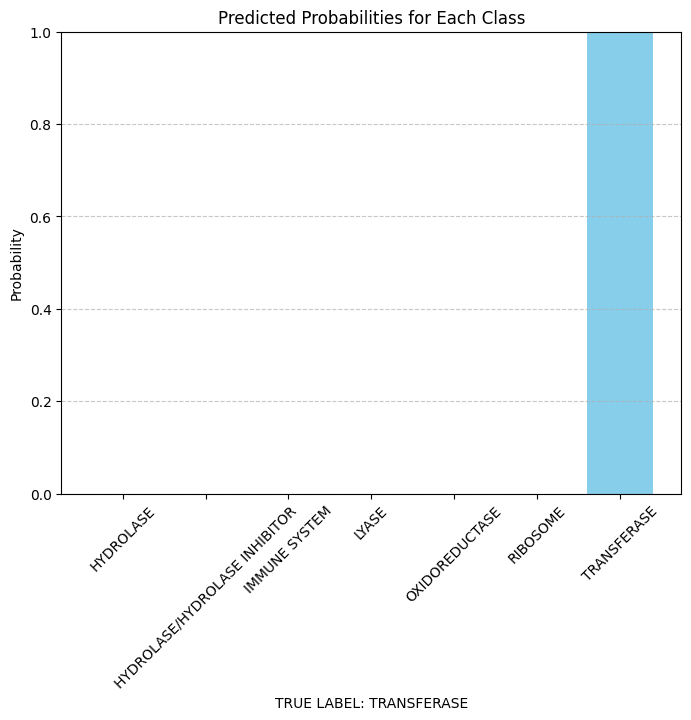

In [40]:
# TRUE LABEL TRANSFERASE
_1A0F = protein_tokenizer(tokenizer,'MKLFYKPGACSLASHITLRESGKDFTLVSVDLMKKRLENGDDYFAVNPKGQVPALLLDDGTLLTEGVAIMQYLADSVPDRQLLAPVNSISRYKTIEWLNYIATELHKGFTPLFRPDTPEEYKPTVRAQLEKKLQYVNEALKDEHWICGQRFTIADAYLFTVLRWAYAVKLNLEGLEHIAAFMQRMAERPEVQDALSAEGLK')
_1A0F_proba = model.predict(_1A0F)[0]

plt.figure(figsize=(8, 6))
plt.bar(classes, _1A0F_proba, color='skyblue')
plt.title("Predicted Probabilities for Each Class")
plt.ylabel("Probability")
plt.xlabel("TRUE LABEL: TRANSFERASE")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


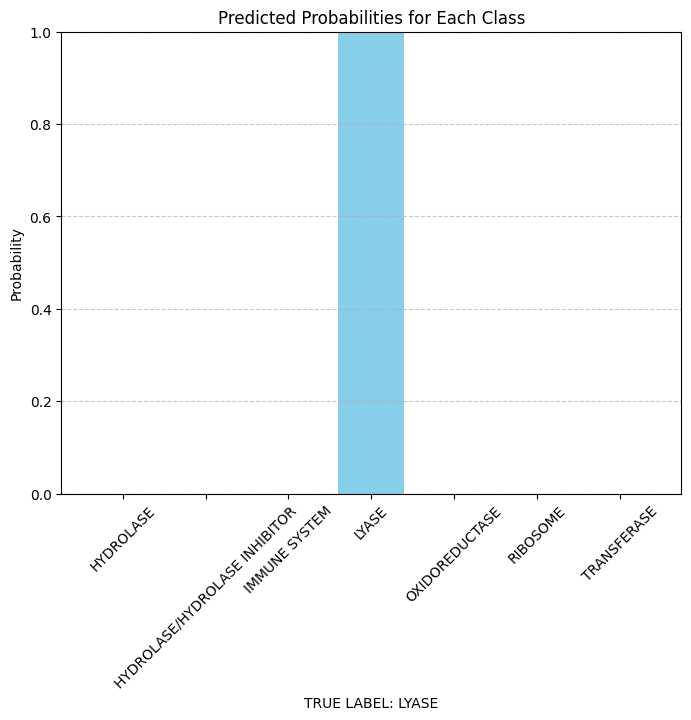

In [41]:
# TRUE LABEL LYASE
_8RLP = protein_tokenizer(tokenizer,'MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKPLSVSYDQATSLRILNNGHAFNVEFDDSQDKAVLKGGPLDGTYRLIQFHFHWGSLDGQGSEHTVDKKKYAAELHLVHWNTKYGDFGKAVQQPDGLAVLGIFLKVGSAKPGLQKVVDVLDSIKTKGKSADFTNFDPRGLLPESLDYWTYPGSLTTPPLLECVTWIVLKEPISVSSEQVLKFRKLNFNGEGEPEELMVDNWRPAQPLKNRQIKASFK')
_8RLP_proba = model.predict(_8RLP)[0]

plt.figure(figsize=(8, 6))
plt.bar(classes, _8RLP_proba, color='skyblue')
plt.title("Predicted Probabilities for Each Class")
plt.ylabel("Probability")
plt.xlabel("TRUE LABEL: LYASE")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


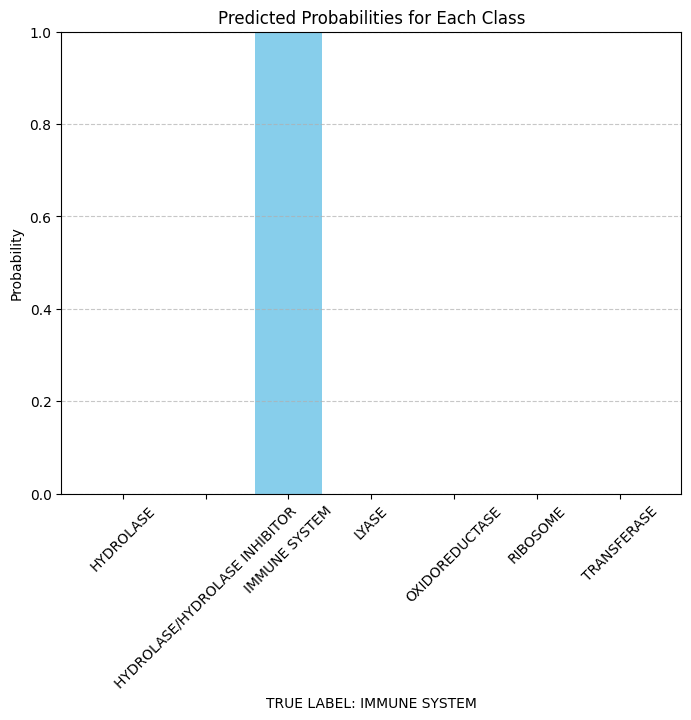

In [42]:
# TRUE LABEL IMMUNE SYSTEM
_9MMV_1 = protein_tokenizer(tokenizer,'QVQLVESGGGLVQPGGSLRLSCAASGFTFSSSGLHWVRQAPGKGLEWVSGIDSSSSTTYYADSVKGRFTISRDNSKNTLYLQMNSLRAEDTAVYYCARYYFDVWGQGTLVTVSSASTKGPSVFPLAPSSKSTSGGTAALGCLVKDYFPEPVTVSWNSGALTSGVHTFPAVLQSSGLYSLSSVVTVPSSSLGTQTYICNVNHKPSNTKVDKKVEPKSCD')
_9MMV_1_proba = model.predict(_9MMV_1)[0]

plt.figure(figsize=(8, 6))
plt.bar(classes, _9MMV_1_proba, color='skyblue')
plt.title("Predicted Probabilities for Each Class")
plt.ylabel("Probability")
plt.xlabel("TRUE LABEL: IMMUNE SYSTEM")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


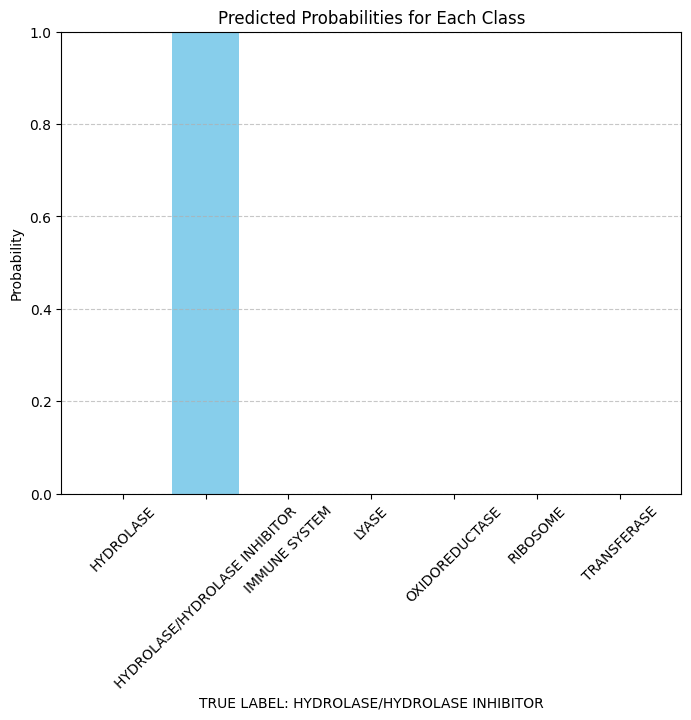

In [43]:
# TRUE LABEL INHIBITOR
_4P1R = protein_tokenizer(tokenizer,'TSEEWQGLMQFTLPVRLCKEIELFHFDIGPFENMWPGIFVYMVHRSCGTSCFELEKLCRFIMSVKKNYRRVPYHNWKHAVTVAHCMYAILQNNHTLFTDLERKGLLIACLCHDLDHRGFSNSYLQKFDHPLAALYSTSTMEQHHFSQTVSILQLEGHNIFSTLSSSEYEQVLEIIRKAIIATDLALYFGNRKQLEEMYQTGSLNLNNQSHRDRVIGLMMTACDLCSVTKLWPVTKLTANDIYAEFWAEGDEMKKLGIQPIPMMDRDKKDEVPQGQLGFYNAVAIPCYTTLTQILPPTEPLLKACRDNLSQWEKVIRGEETATWISSPSVAQKAAASED')
_4P1R_proba = model.predict(_4P1R)[0]

plt.figure(figsize=(8, 6))
plt.bar(classes, _4P1R_proba, color='skyblue')
plt.title("Predicted Probabilities for Each Class")
plt.ylabel("Probability")
plt.xlabel("TRUE LABEL: HYDROLASE/HYDROLASE INHIBITOR")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


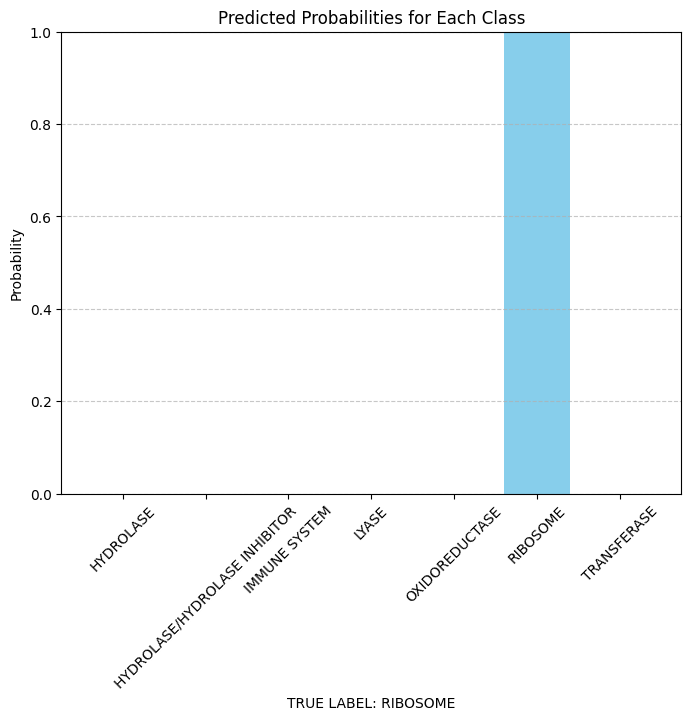

In [44]:
# TRUE LABEL INHIBITOR
_1BXY = protein_tokenizer(tokenizer,'MPRLKVKLVKSPIGYPKDQKAALKALGLRRLQQERVLEDTPAIRGNVEKVAHLVRVEVVE')
_1BXY_proba = model.predict(_1BXY)[0]

plt.figure(figsize=(8, 6))
plt.bar(classes, _1BXY_proba, color='skyblue')
plt.title("Predicted Probabilities for Each Class")
plt.ylabel("Probability")
plt.xlabel("TRUE LABEL: RIBOSOME")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

NEURAL NETWORK

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

fnn = Sequential()
fnn.add(Dense(128, input_dim=529, activation='relu'))  # Input layer with 529 features

# Add 100 hidden layers with 128 units each
for _ in range(100):
    fnn.add(Dense(128, activation='relu'))

# Output layer with 7 classes
fnn.add(Dense(7, activation='softmax'))

fnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [47]:
fnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

Epoch 1/15
2562/2562 ━━━━━━━━━━━━━━━━━━━━ 61s 18ms/step - accuracy: 0.2219 - loss: 1.8682 - val_accuracy: 0.2249 - val_loss: 1.8612
Epoch 2/15
2562/2562 ━━━━━━━━━━━━━━━━━━━━ 44s 17ms/step - accuracy: 0.2248 - loss: 1.8642 - val_accuracy: 0.2249 - val_loss: 1.8623
Epoch 3/15
2562/2562 ━━━━━━━━━━━━━━━━━━━━ 27s 11ms/step - accuracy: 0.2252 - loss: 1.8633 - val_accuracy: 0.2249 - val_loss: 1.8613
Epoch 4/15
2562/2562 ━━━━━━━━━━━━━━━━━━━━ 45s 18ms/step - accuracy: 0.2223 - loss: 1.8655 - val_accuracy: 0.2249 - val_loss: 1.8613
Epoch 5/15
2562/2562 ━━━━━━━━━━━━━━━━━━━━ 44s 17ms/step - accuracy: 0.2235 - loss: 1.8658 - val_accuracy: 0.2249 - val_loss: 1.8616
Epoch 6/15
2562/2562 ━━━━━━━━━━━━━━━━━━━━ 51s 20ms/step - accuracy: 0.2261 - loss: 1.8616 - val_accuracy: 0.2249 - val_loss: 1.8616
Epoch 7/15
2562/2562 ━━━━━━━━━━━━━━━━━━━━ 87s 22ms/step - accuracy: 0.2248 - loss: 1.8635 - val_accuracy: 0.2249 - val_loss: 1.8620
Epoch 8/15
2562/2562 ━━━━━━━━━━━━━━━━━━━━ 52s 20ms/step - accuracy: 0.2246 -